<a href="https://colab.research.google.com/github/ilhamAdhim/machine-learning-terapan-dicoding/blob/main/Submission_1_MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install opendatasets

In [25]:
# Import all required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importing layers from keras. Use LSTM for input layer, and Dense for hidden and output layer
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

# Import SGD Optimizers
from tensorflow.keras.optimizers import Adam

# Import for splitting test and training data set
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

import opendatasets as od

In [26]:
od.download("https://www.kaggle.com/fawwazzainiahmad/indonesian-government-owned-company-stock-price")

Skipping, found downloaded files in "./indonesian-government-owned-company-stock-price" (use force=True to force download)


In [27]:
df = pd.read_csv('/content/indonesian-government-owned-company-stock-price/TLKM.JK.csv', parse_dates=True, squeeze=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-28,835.0,835.0,825.0,825.0,117.375580,90095000.0
1,2004-09-29,825.0,825.0,810.0,825.0,117.375580,29370000.0
2,2004-09-30,825.0,830.0,825.0,830.0,118.086952,42927500.0
3,2004-10-01,830.0,845.0,825.0,840.0,119.509682,108387500.0
4,2004-10-04,845.0,880.0,845.0,870.0,123.777878,424210000.0
...,...,...,...,...,...,...,...
3975,2020-09-28,2710.0,2730.0,2660.0,2660.0,2660.000000,89256700.0
3976,2020-09-29,2690.0,2690.0,2630.0,2630.0,2630.000000,155853900.0
3977,2020-09-30,2630.0,2650.0,2540.0,2560.0,2560.000000,235611600.0
3978,2020-10-01,2600.0,2760.0,2600.0,2750.0,2750.000000,225006000.0


In [28]:
print("Total Data : {} \n".format(len(df)))
print("Date range from : {} to {}".format(df.head(1)['Date'].values, df.tail(1)['Date'].values))

Total Data : 3980 

Date range from : ['2004-09-28'] to ['2020-10-02']


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3980 non-null   object 
 1   Open       3944 non-null   float64
 2   High       3944 non-null   float64
 3   Low        3944 non-null   float64
 4   Close      3944 non-null   float64
 5   Adj Close  3944 non-null   float64
 6   Volume     3944 non-null   float64
dtypes: float64(6), object(1)
memory usage: 217.8+ KB


In [30]:
df_new = df.dropna(how='any',axis=0) 
df_new

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-28,835.0,835.0,825.0,825.0,117.375580,90095000.0
1,2004-09-29,825.0,825.0,810.0,825.0,117.375580,29370000.0
2,2004-09-30,825.0,830.0,825.0,830.0,118.086952,42927500.0
3,2004-10-01,830.0,845.0,825.0,840.0,119.509682,108387500.0
4,2004-10-04,845.0,880.0,845.0,870.0,123.777878,424210000.0
...,...,...,...,...,...,...,...
3975,2020-09-28,2710.0,2730.0,2660.0,2660.0,2660.000000,89256700.0
3976,2020-09-29,2690.0,2690.0,2630.0,2630.0,2630.000000,155853900.0
3977,2020-09-30,2630.0,2650.0,2540.0,2560.0,2560.000000,235611600.0
3978,2020-10-01,2600.0,2760.0,2600.0,2750.0,2750.000000,225006000.0


In [31]:
# Display 5 latest data to check the latest date
df_new.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3975,2020-09-28,2710.0,2730.0,2660.0,2660.0,2660.0,89256700.0
3976,2020-09-29,2690.0,2690.0,2630.0,2630.0,2630.0,155853900.0
3977,2020-09-30,2630.0,2650.0,2540.0,2560.0,2560.0,235611600.0
3978,2020-10-01,2600.0,2760.0,2600.0,2750.0,2750.0,225006000.0
3979,2020-10-02,2750.0,2750.0,2650.0,2680.0,2680.0,140161900.0


In [32]:
df_new.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3.944000e+03
mean,2436.882860,2464.980984,2409.163286,2436.994168,1742.819242,9.844441e+07
std,1076.058496,1084.441789,1068.223754,1076.106605,1400.825963,6.096605e+07
min,820.000000,825.000000,810.000000,825.000000,117.375580,0.000000e+00
25%,1540.000000,1560.000000,1520.000000,1540.000000,443.950134,6.014665e+07
50%,2100.000000,2125.000000,2060.000000,2100.000000,1266.817993,8.548225e+07
75%,3406.250000,3456.250000,3370.000000,3422.500000,3155.009827,1.209330e+08
max,4800.000000,4840.000000,4780.000000,4800.000000,4465.643555,8.080050e+08


In [34]:
df_new['Date'] = pd.to_datetime(df_new['Date'] , format='%Y-%m-%d')
df_new['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      2004-09-28
1      2004-09-29
2      2004-09-30
3      2004-10-01
4      2004-10-04
          ...    
3975   2020-09-28
3976   2020-09-29
3977   2020-09-30
3978   2020-10-01
3979   2020-10-02
Name: Date, Length: 3944, dtype: datetime64[ns]

Text(0, 0.5, 'Harga')

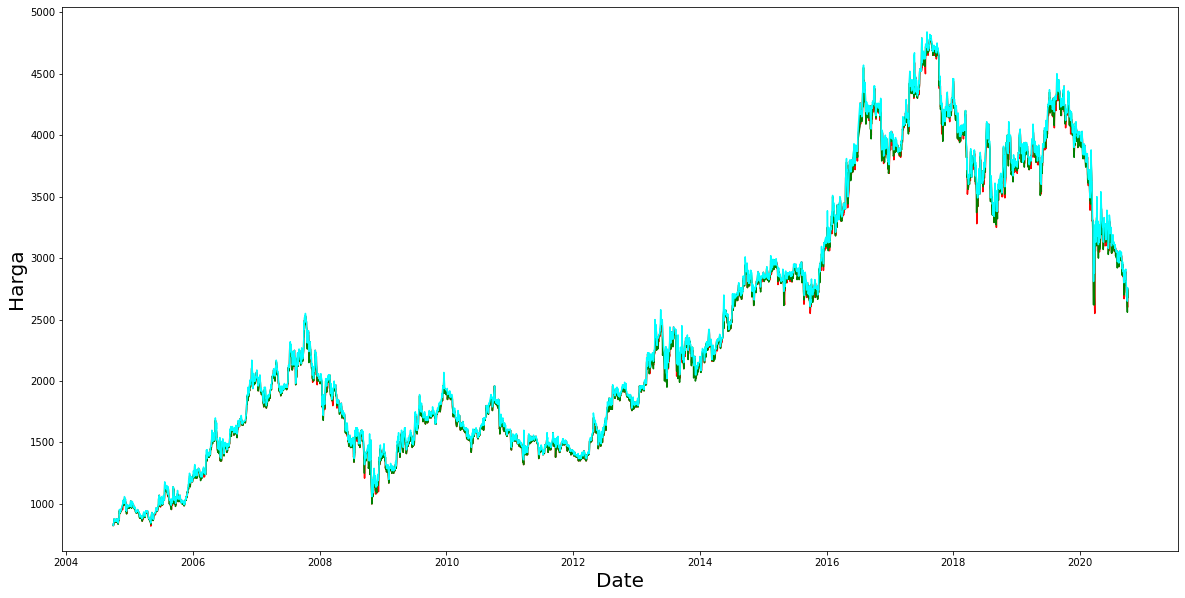

In [36]:
visual_plot =df_new[['Date','Close', 'Open', 'High']]

plt.figure(figsize=(20,10))

sns.lineplot(y=visual_plot['Open'], color="r", x=visual_plot['Date'])
sns.lineplot(y=visual_plot['Close'], color="g", x=visual_plot['Date'])
sns.lineplot(y=visual_plot['High'], color="cyan", x=visual_plot['Date'])

plt.xlabel('Date', fontsize=20)
plt.ylabel('Harga', fontsize=20)

In [37]:
df_new.index = df_new['Date']
df_new = df_new.drop(['Date','Open','High','Low', 'Volume', 'Adj Close'], axis=1)

In [38]:
minmax_scaler = MinMaxScaler()
df_new = minmax_scaler.fit_transform(df_new)
train_set, test_set = df_new[0:int(len(df_new)*0.8), :], df_new[int(len(df_new)*0.8):len(df_new), :]

In [39]:
def dataset_preparation(dataset, window):
    dframe = []
    label = []

    for i in range(len(dataset) - window - 1):
        data = dataset[i:(i + window), 0]
        dframe.append(data)
        label.append(dataset[i+window,0])
    return np.array(dframe), np.array(label)

x_train, y_train = dataset_preparation(train_set,80)
x_test, y_test = dataset_preparation(test_set,80)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_train.shape[1],1))

In [40]:
print("Train Set shapes : {} {}".format(x_train.shape, y_train.shape))
print("Test Set shapes : {} {}".format(x_test.shape, y_test.shape))

Train Set shapes : (3074, 80, 1) (3074,)
Test Set shapes : (708, 80, 1) (708,)


In [41]:
# Arsitektur Model
model = Sequential([
  LSTM(40),
  Dropout(0.2),
  Dense(1),
])

In [42]:
# Setting optimizer SGD Optimizer and learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model with Huber and MAE (Mean Absolute Error) metrics
model.compile(
    metrics=["mae"],
    optimizer=optimizer,
    loss='mean_squared_error')

In [43]:
# Training Model and save it to history variable.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
97/97 [==============================] - 6s 40ms/step - loss: 0.0084 - mae: 0.0529 - val_loss: 7.8849e-04 - val_mae: 0.0216
Epoch 2/20
97/97 [==============================] - 3s 36ms/step - loss: 0.0013 - mae: 0.0240 - val_loss: 0.0011 - val_mae: 0.0271
Epoch 3/20
97/97 [==============================] - 4s 37ms/step - loss: 0.0011 - mae: 0.0217 - val_loss: 0.0015 - val_mae: 0.0329
Epoch 4/20
97/97 [==============================] - 3s 35ms/step - loss: 8.9425e-04 - mae: 0.0199 - val_loss: 7.9999e-04 - val_mae: 0.0220
Epoch 5/20
97/97 [==============================] - 3s 35ms/step - loss: 8.4630e-04 - mae: 0.0197 - val_loss: 5.9024e-04 - val_mae: 0.0183
Epoch 6/20
97/97 [==============================] - 3s 36ms/step - loss: 7.3314e-04 - mae: 0.0182 - val_loss: 8.3540e-04 - val_mae: 0.0228
Epoch 7/20
97/97 [==============================] - 4s 36ms/step - loss: 7.6827e-04 - mae: 0.0190 - val_loss: 5.4919e-04 - val_mae: 0.0173
Epoch 8/20
97/97 [=============================

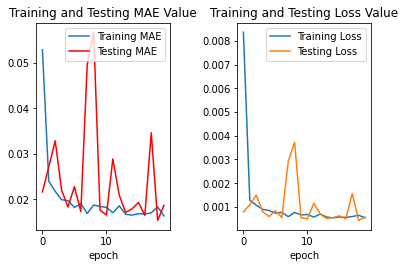

In [44]:
# Create plot for mae and val_mae
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=3.0)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'], 'r')
plt.title('Training and Testing MAE Value')
plt.xlabel('epoch')
plt.legend(['Training MAE', 'Testing MAE'], loc='upper right')

# Create plot for loss and val_loss
plt.subplot(1, 2, 2) # index 2
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing Loss Value')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')

plt.show()

In [45]:
predict_test = model.predict(x_train)
predict_test = minmax_scaler.inverse_transform(predict_test)
actual_test = minmax_scaler.inverse_transform([y_train])

In [46]:
# initialise new dataframe for comparison of prediction and actual value.
data_predict_and_actual = {'actual_value':actual_test[0], 'prediction_value' : predict_test[:,0]}

df_predict = pd.DataFrame(data_predict_and_actual)
df_predict['Date'] = df['Date'][:len(df_predict['actual_value'])]

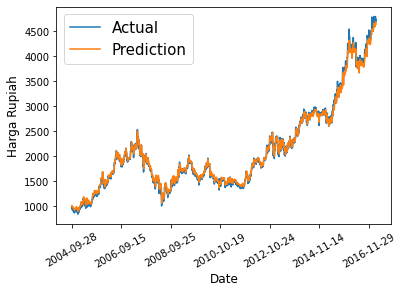

In [52]:
df_predict.plot(x="Date" )
plt.ylabel('Harga Rupiah', size=12)

plt.xlabel('Date', size=12)
plt.xticks(rotation=30)

plt.legend(["Actual", "Prediction"], fontsize=15, loc='upper left')
plt.show();